# Rental Bikes on Demand: Predictive Analytics for Hourly Bike Rental Demands
## - Phase 2: Machine Learning Implementation
---
#### Tony Smith
---
# Table of Contents
1. [Introduction](#Introduction)
    - [Phase 1 Summary](#Phase-1-Summary)
    - [Report Overview](#Report-Overview)
    - [Overview of Methodology](#Overview-of-Methodology)
2. [Predictive Modelling](#Predictive-Modelling)
    - [Imports](#Imports)
    - [Functions](#Functions)
    - [Feature Selection (FS)](#Feature-Selection-FS)
    - [Model Fitting & Tuning](#Model-Fitting--Tuning)
        - [Poisson Regressor](#Poisson-Regressor)
        - [Histogram-based Gradient Boosting Regressor](#Histogram-based-Gradient-Boosting-Regressor)
    - [Neural Network Model Fitting & Tuning](#Neural-Network-Model-Fitting--Tuning)
    - [Model Comparison](#Model-Comparison)
3. [Critique & Limitations](#Critique--Limitations)
4. [Summary & Conclusions](#Summary--Conclusions)
    - [Project Summary](#Project-Summary)
    - [Summary of Findings](#Summary-of-Findings)
    - [Conclusions](#Conclusions)
8. [References](#References)


# Introduction

- ## Phase 1 Summary
    Phase 1 consists of three key stages for implementing machine learning for a business. It involves understanding the business, the data, and preparing the data for machine learning models. Understanding the business' project objectives and requirements from a business point of view helps guide the project with the goal of predicting hourly bike rental demands in Seoul, South Korea, ensuring optimal availability and service reliability. With the given dataset, I had to familiarize myself with it by researching its source and its intended purpose by exploring the dataset to understand its structure, content, and quality. Assessing data quality and identifying any issues, such as missing values or anomalies, is also a part of this stage. For the data preparation stage, I needed to keep in mind what the business' goal was and prepare the data fit for predicting hourly bike rentals. This involved splitting the date into components like days, months, years, days of the week, and weekends to create meaningful features for the model. Making sure each feature is correctly assigned the appropriate data type, analyzing the relationships between different weather features and understanding how they can be used in machine learning is also necessary. Ensuring each feature is useful for machine learning, such as identifying and removing functioning days feature, is part of this process. Finally, visualizing each feature helps extract insights and understand its distribution and relationships with other features.

    Phase 2 consists of modelling and evaluations. Without understanding the business, we would not have a framework as to what the goal is. Understanding the data helps us know which model to implement and the evaluations needed and preparing the data for modelling creates a framework for us to build on in phase 2. This framework guides us in selecting the appropriate machine learning models. For instance, using a logistic regression model to predict bike rentals wouldn't make sense if all the data in the dataset is not categorical. Therefore, if we want to use a logistic regression model, we need to prepare the dataset correctly first.

- ## Report Overview

    ### Context and Aim

    This report focuses on predicting hourly bike rental demands in Seoul, South Korea. The aim is to develop and evaluate various machine learning models to ensure optimal availability and service reliability of rental bikes. The report builds on the initial data exploration and preparation conducted in Phase 1, progressing to model fitting, hyperparameter tuning, and performance evaluation in Phase 2.
    Main Findings

    - Poisson Regressor: The Poisson Regressor was well-suited for count data, providing reasonable predictions with a mean Poisson deviance of 226. This model was further stabilized using bootstrap sampling.

    - Ensemble Model: Combining models with and without feature selection resulted in an improved performance over the individual models, demonstrating the benefit of ensemble methods.

    - Histogram-based Gradient Boosting Regressor: This model showed the best performance with a mean Poisson deviance of 37.20, an R² score of 0.92, indicating a high level of accuracy and efficiency.

    - XGBoost: While effective, XGBoost did not perform as well as the Gradient Boosting Regressor, with a mean Poisson deviance of 150.85 and an R² score of 0.79.
        
    - Neural Network: The neural network model, though basic, achieved a mean Poisson deviance of 156.98, demonstrating potential for future improvements with more advanced architectures and tuning.

    ### Key Takeaway

    The Histogram-based Gradient Boosting Regressor emerged as the most effective model for predicting hourly bike rental demands, providing high accuracy and efficiency. Ensemble methods and neural networks also showed promise, indicating potential for further exploration and refinement.

    ### Recommendations

    - Adopt Gradient Boosting: Implement the Histogram-based Gradient Boosting Regressor for predicting bike rental demands due to its superior performance.
        
    - Explore Advanced Tuning: Consider using advanced hyperparameter tuning techniques such as Bayesian optimization to further improve model performance.
    
    - Incorporate Additional Features: Enhance the model by integrating additional relevant features such as the air quality index (AQI) and heat index to capture environmental influences on bike rental patterns.

    - Advanced Neural Network Architectures: Invest in developing more sophisticated neural network models with varied architectures and regularization techniques to potentially achieve even better accuracy.

    - Efficiency Improvements: Explore more efficient methods like random search or alternative ensemble techniques to reduce computational costs while maintaining high model performance.

- ## Overview of Methodology
    ### Poisson Regressor
    In order to predict the hourly bike rental counts, I began by using the Poisson Regressor, which is suitable for count data. I conducted hyperparameter tuning using GridSearchCV, where I explored various values for alpha and fit_intercept to find the best combination. Following that, I utilized learning curve analysis to identify the optimal amount of training data, ensuring that the model was neither overfitting nor underfitting.

    To improve model stability, I employed bootstrap sampling, creating multiple resampled training datasets and evaluating the model on these samples. This approach helped estimate the variability and robustness of the Poisson Regressor. The final model was evaluated using mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE), and I visualized the predictions against actual values.

    To enhance the stability of the model, I used bootstrap sampling to create multiple resampled training datasets. I then assessed the model using these samples to measure its variability and robustness. These generated samples were applied to all models. The final evaluation of the model included assessing its mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE). I also developed visualizations to compare the model's predictions with the actual values.

    ### Ensemble Model

    Next, I used an ensemble model to capitalize on the strengths of multiple models. The ensemble consisted of two Poisson Regressors: one with feature selection using a RandomForestClassifier and one without feature selection. I used VotingRegressor to aggregate their predictions. After training the ensemble model on the resampled training data, I assessed its performance using the same metrics as before and visualized the outcomes.

    ### Histogram-based Gradient Boosting Regressor

    For the Histogram-based Gradient Boosting Regressor, I improved its performance by conducting a grid search over parameters such as learning_rate, max_leaf_nodes, min_samples_leaf, and max_iter. This model was selected for its efficiency and effectiveness in handling continuous and categorical features. After identifying the best hyperparameters, I trained the final model and evaluated it using mean Poisson deviance, R² score, MSE, and MAE, and visualized the predictions.

    ### XGBoost (Extreme Gradient Boosting)

    I incorporated XGBoost, known for its speed and accuracy, by adjusting any invalid input values to ensure compatibility. I performed hyperparameter tuning with GridSearchCV, exploring parameters like learning_rate, max_depth, min_child_weight, and n_estimators. After training the model with the optimal parameters, I evaluated its performance using the same set of metrics and visualized the results.

    ### Neural Network

    Finally, I implemented a neural network using the Keras Sequential API. The network comprised two hidden layers with ReLU activation (64 and 32 neurons, respectively) and an output layer with an exponential activation function to ensure positive predictions. I standardized the features, compiled the model with mean_squared_error loss and adam optimizer, and trained it on the scaled training data. The neural network's performance was evaluated using mean Poisson deviance, R² score, MSE, and MAE, and the predictions were visualized against actual values.

# Predictive Modelling

 ### Imports

In [1]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, learning_curve
from sklearn.ensemble import RandomForestClassifier, VotingRegressor, HistGradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer, mean_poisson_deviance, r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import PoissonRegressor, Lasso
from sklearn.utils import resample
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
from scipy.stats import ttest_rel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.experimental import enable_hist_gradient_boosting
import chardet
pd.set_option('display.max_columns', None)
sns.set(style="ticks", context="notebook", palette="colorblind", font_scale=1)
csvname = 'Phase1Data_Group18.csv'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Functions

In [2]:
def load_dataset(csvname):
    """ 
    Load a dataset from a CSV file using the appropriate encoding.

    The function first reads the CSV file in binary mode to detect its encoding using the chardet library.
    Then, it loads the CSV into a pandas DataFrame using the detected encoding.
    This ensures that the DataFrame correctly interprets the data in the file, especially when dealing with different languages or special characters.

    Parameters:
        csvname (str): The path to the CSV file to be loaded.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the data from the CSV file.
    """
    with open(csvname, 'rb') as f:
        csv_encoding = chardet.detect(f.read())

    # Loading in the dataset
    df = pd.read_csv(csvname, encoding=csv_encoding['encoding'])
    pd.options.display.float_format = '{:.3f}'.format
    return df



def feature_target(df, target_y, drop_columns):
    """
    Splits the DataFrame into feature matrix (X) and target vector (y).

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_y (str): The column name of the target variable.
    drop_columns (list): List of columns to drop to form the feature matrix.

    Returns:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target vector.
    """
    y = df[target_y]
    X = df.drop(drop_columns, axis=1)
    return X, y



def ohe(df, ohe_columns):
    """
    Performs one-hot encoding on specified columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    ohe_columns (list): List of columns to be one-hot encoded.

    Returns:
    df (pd.DataFrame): DataFrame with one-hot encoded columns.
    """
    dummies = pd.get_dummies(df[ohe_columns])
    df = pd.concat([df, dummies], axis=1)
    df.drop(ohe_columns, axis=1, inplace=True)
    return df



def custom_poisson_deviance(y_true, y_pred):
    """
    Calculates the mean Poisson deviance between true and predicted values.

    Parameters:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values.

    Returns:
    float: Mean Poisson deviance.
    """
    y_pred = np.clip(y_pred, 1e-10, None)  # Ensure strictly positive predictions
    return mean_poisson_deviance(y_true, y_pred)



def bootstrap_cv(X, y, model, params, n_bootstraps=100, sample_size=None):
    """
    Performs bootstrap cross-validation to evaluate model performance.

    Parameters:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target vector.
    model: Machine learning model to be evaluated.
    params (dict): Hyperparameters to set for the model.
    n_bootstraps (int, optional): Number of bootstrap iterations (default is 100).
    sample_size (int, optional): Number of samples to draw for each bootstrap iteration (default is None, which uses the size of X).

    Returns:
    np.array: Array of Poisson deviances for each bootstrap iteration.
    """
    bootstrap_deviances = []
    
    for i in range(n_bootstraps):
        X_bootstrap, y_bootstrap = resample(X, y, n_samples=sample_size, random_state=i)
        model.set_params(**params)
        model.fit(X_bootstrap, y_bootstrap)
        y_pred = model.predict(X)
        y_pred = np.clip(y_pred, 1e-10, None)  # Ensure strictly positive predictions
        deviance = mean_poisson_deviance(y, y_pred)
        bootstrap_deviances.append(deviance)
    
    return np.array(bootstrap_deviances), X_bootstrap, y_bootstrap

- Quick note - I changed data from phase 1 by including unbinned weather data. It was recommended that I do not categorize weather as it will create high dimensionality.

### Feature Selection (FS)
First I addressed the feedback from Phase 1 by deciding to remove the Year column and avoid categorizing the weather columns to reduce dimensionality. Using the feature_target function, I separated the target variable Rented_Bike_Count and other non-feature columns (Rainfall_Bins, Snowfall_Bins, Wind_Speed_Bins, Year) from the feature matrix, resulting in X (features) and y (target). Next, I perform one-hot encoding on the categorical columns Holiday, Season, and Day_Night using the ohe function. This converts these categorical variables into binary columns, preparing the dataset for model training.

In [3]:
df = load_dataset(csvname)
df.head()

,Day,Month,Year,Day_of_Week,Weekend,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Rainfall,Snowfall,Season,Holiday,Rainfall_Bins,Snowfall_Bins,Wind_Speed_Bins,Day_Night
0,1,12,2017,4,0,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,Winter,No Holiday,No rain,No Snow,Light,Night
1,1,12,2017,4,0,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,Winter,No Holiday,No rain,No Snow,Calm,Night
2,1,12,2017,4,0,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,Winter,No Holiday,No rain,No Snow,Calm,Night
3,1,12,2017,4,0,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,Winter,No Holiday,No rain,No Snow,Calm,Night
4,1,12,2017,4,0,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,Winter,No Holiday,No rain,No Snow,Light,Night


In [4]:
non_features = ['Rented_Bike_Count', 'Rainfall_Bins', 'Snowfall_Bins', 'Wind_Speed_Bins', 'Year']
target_y = 'Rented_Bike_Count'
X, y = feature_target(df, target_y, non_features)
dummies = ['Holiday', 'Season', 'Day_Night']
X = ohe(X, dummies)

### Improving Distributions
To enhance model accuracy before hyperparameter tuning, I transformed the distributions of Wind_Speed, Humidity, and Dew_Point_Temperature for more balanced distributions. Initially, I plotted histograms to visualize their distributions:

- Wind_Speed: Applied a log transformation (np.log1p(X.Wind_Speed)).
- Humidity: Applied a power transformation (np.power(X.Humidity, 1.4)).
- Dew_Point_Temperature: Applied a power transformation with an absolute value correction (np.abs(X.Dew_Point_Temperature), then np.power(X.Dew_Point_Temperature, 0.7)).

These transformations resulted in more evenly distributed features, leading to improved model performance for Poisson Regression.

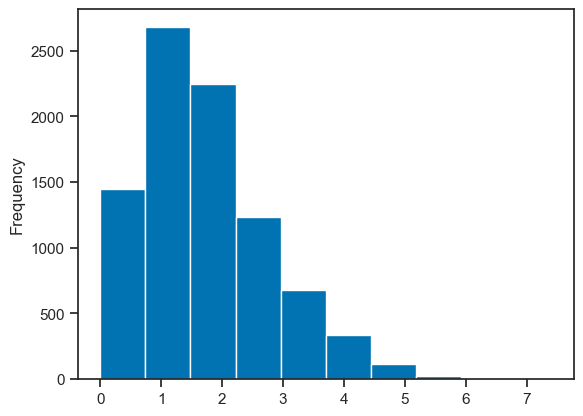

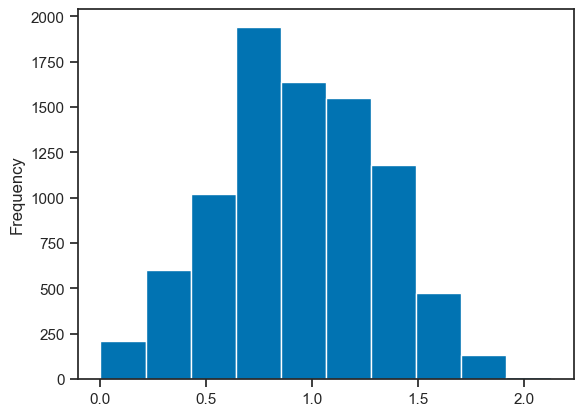

In [5]:
plt.hist(X.Wind_Speed)
plt.ylabel('Frequency')
plt.show()

plt.hist(np.log1p(X.Wind_Speed))
plt.ylabel('Frequency')
plt.show()
plt.close()

X.Wind_Speed = np.log1p(X.Wind_Speed)

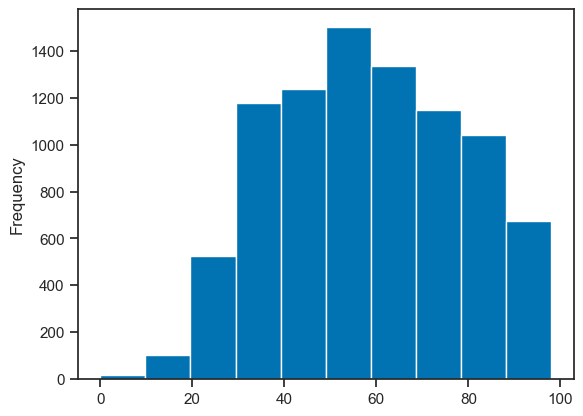

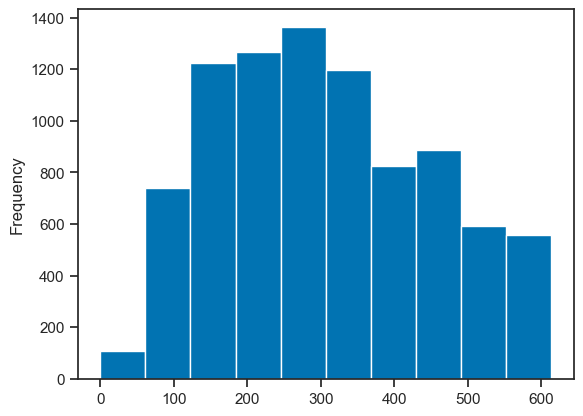

In [6]:
plt.hist(X.Humidity)
plt.ylabel('Frequency')
plt.show()

plt.hist(np.power(X.Humidity, 1.4))
plt.ylabel('Frequency')
plt.show()
plt.close()

X.Wind_Speed = np.power(X.Humidity, 1.4)

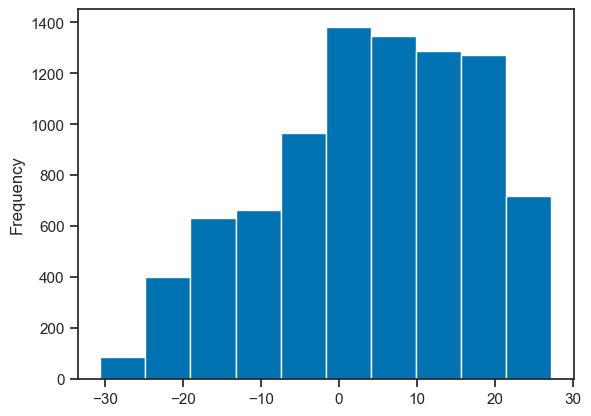

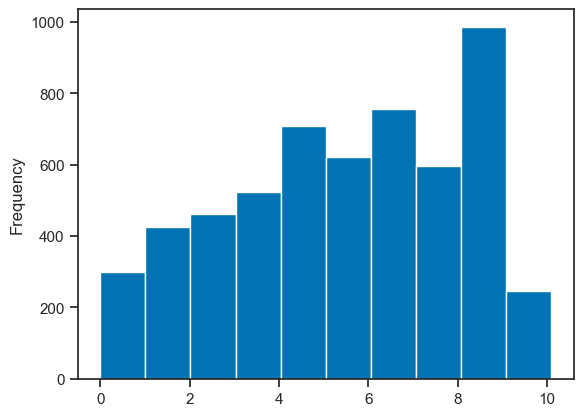

In [7]:
plt.hist(X.Dew_Point_Temperature)
plt.ylabel('Frequency')
plt.show()

plt.hist(np.power(X.Dew_Point_Temperature,.7))
plt.ylabel('Frequency')
plt.show()

# Has negative values, so we need to take the absolute value
X.Dew_Point_Temperature = np.abs(X.Dew_Point_Temperature)
X.Dew_Point_Temperature = np.power(X.Dew_Point_Temperature, .7)

 ### Feature Selection
 I performed feature selection using Lasso regression as it was recommended by scikit-learn's documentation. (1.13. Feature Selection, n.d.) First, I ensured the target variable y was non-negative and split the dataset into training and test sets. I then fitted a Lasso model to the training data to identify important features. Using SelectFromModel, I selected the relevant features and transformed both the training and test sets. Finally, I printed the names of the selected features and the features that were removed.

In [8]:
# Ensure y is non-negative
y = np.clip(y, a_min=0, a_max=None)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define a Lasso model for feature selection
lasso = Lasso(alpha=0.1, max_iter=10000)

# Fit the Lasso model to select features
lasso.fit(X_train, y_train)

# Select features based on Lasso
selector = SelectFromModel(lasso, prefit=True)
X_train_selected = selector.transform(X_train.values)
X_test_selected = selector.transform(X_test.values)

# Get the support mask and feature names
support_mask = selector.get_support()
selected_feature_names = X.columns[support_mask]

# Transform selected features back to DataFrame
X_train = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Print selected features
print(f'Selected features: {selected_feature_names.tolist()}')

# Identify and print removed features
removed_feature_names = set(X.columns) - set(selected_feature_names)
print(f'Features removed: {removed_feature_names}')

Selected features: ['Day', 'Month', 'Day_of_Week', 'Weekend', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point_Temperature', 'Rainfall', 'Snowfall', 'Holiday_Holiday', 'Season_Autumn', 'Season_Summer', 'Season_Winter', 'Day_Night_Day']
Features removed: {'Day_Night_Night', 'Holiday_No Holiday', 'Season_Spring'}


## Model Fitting & Tuning

## Poisson Regressor
- It was recommended that I use the mean Poisson deviance (Poisson Regression and Non-Normal Loss, n.d.) as a measure since my target is considered a "count". I chose the Poisson Regressor for my first model as it is well-suited for my dataset. I was not sure how to implement these, and use scikit-learn's website as reference. (Mean_poisson_deviance, n.d.) To ensure accuracy, I created a customised scorer to make sure no score is a negative number or zero. I also normalised my features using Standard Scaler, which standardizes the features by subtracting the mean and dividing by the standard deviation of the training samples.

- I chose to use Grid Search CV because I wanted to explore all parameter combinations for each alpha to determine the best one. After finding the best parameters, I printed them as a sanity check. Then, I fit the best model and made predictions. To ensure all predictions were strictly positive, I clipped the predictions. Finally, I calculated and printed the mean Poisson deviance on the test set.

### Poisson Regressor: Hyperparameter Tuning with Grid Search

In [9]:
poisson_scorer = make_scorer(custom_poisson_deviance, greater_is_better=False)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
alpha_range = np.arange(0.1, 1.1, 0.1)
param_grid = {
    'alpha': alpha_range,
    'fit_intercept': [True, False]
}

# Initialize and perform grid search with custom scorer
model = PoissonRegressor(max_iter=1000)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=poisson_scorer)
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print results
print("Best parameters found:", best_params)
print("Best cross-validation score:", -grid_search.best_score_)

# Fit the best model and make predictions
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Check if there are any zero or negative predictions
print("Minimum prediction value before clipping:", y_pred.min())

# Clip predictions to ensure they are strictly positive
y_pred = np.clip(y_pred, 1e-10, None)

# Calculate and print the mean Poisson deviance
test_deviance = mean_poisson_deviance(y_test, y_pred)
print("Test set Mean Poisson Deviance:", test_deviance)

Best parameters found: {'alpha': 0.1, 'fit_intercept': True}
Best cross-validation score: 226.6244168949453
Minimum prediction value before clipping: 9.195540604984551e-07
Test set Mean Poisson Deviance: 243.9700799350264


### Poisson Regressor: Learning Curve
- Now I wanted to determine the optimal training size using the "learning_curve" function. By plotting the training and cross-validation scores, I could see where they converge, indicating an optimal training size. 

- In cross-validation, the training data is divided into five subsets. The model is then trained on four subsets and tested on the remaining subset. This process is repeated five times, with each subset used once as the test set. The results are averaged to provide a more robust evaluation. This helps ensure the model is neither overfitting nor underfitting. I printed the optimal training values as a sanity check.

- I calculated the learning curve for the best Poisson Regressor model using a range of training sizes. I then plotted the mean Poisson deviance for both the training and cross-validation scores across different training sizes. Finally, I identified and printed the optimal number of training examples.

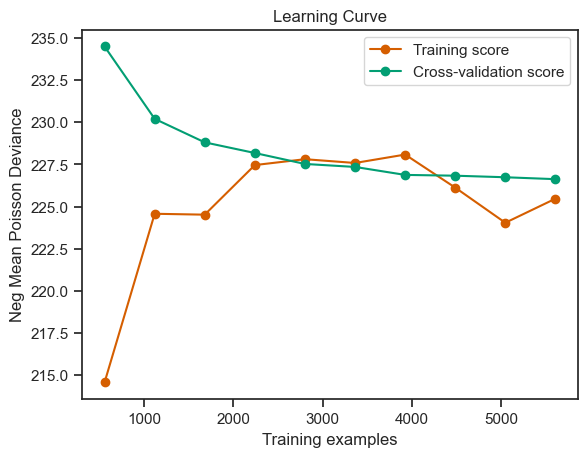

Optimal number of training examples: 5606


In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, 
    scoring='neg_mean_poisson_deviance', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Neg Mean Poisson Deviance')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

optimal_training_examples = train_sizes[np.argmin(test_scores_mean)]
print(f"Optimal number of training examples: {optimal_training_examples}")

### Poisson Regressor: Bootstrap
- I was curious if bootstrapping would help improve the score. I did not realize how computationally expensive it could be and limited the samples. The first run took 198 minutes, and I had to greatly reduce the size of my test.
 
- The original sample size was from 1000 to 3000, with a step of 500. Starting from 10 to 30 with a step of 1 shows the optimal bootstrap sample is 18.

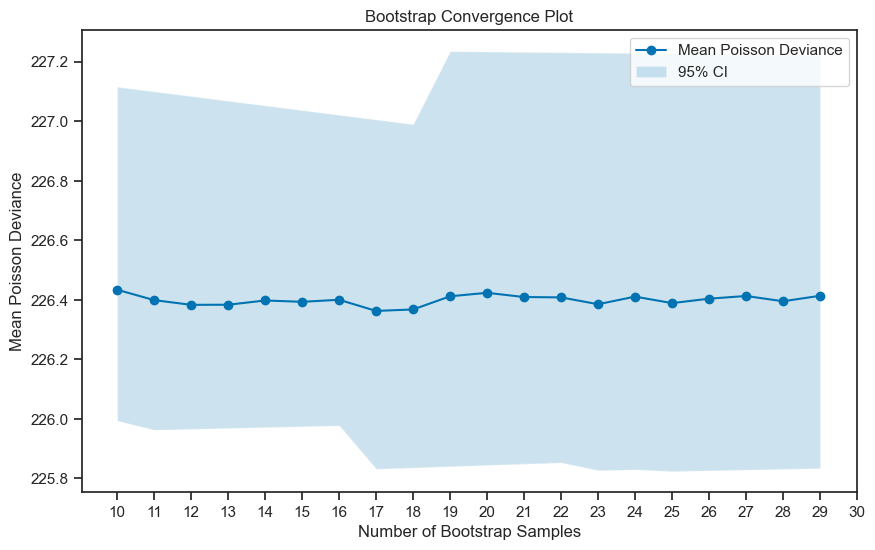

In [11]:
# List to store results for different numbers of bootstraps
results = []
bootstrap_samples = np.arange(10, 30, 1)

# Evaluate the model for different bootstrap samples - only need deviances but the function returns the X and y bootstrap samples as well
for n in bootstrap_samples:
    deviances, _ , _ = bootstrap_cv(X_train, y_train, PoissonRegressor(max_iter=1000), best_params, n_bootstraps=n, sample_size=optimal_training_examples)
    mean_deviance = np.mean(deviances)
    ci_lower, ci_upper = np.percentile(deviances, [2.5, 97.5])
    results.append((n, mean_deviance, ci_lower, ci_upper))

# Convert results to numpy array for easy plotting
results = np.array(results)

# Plot the mean Poisson deviance and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], marker='o', label='Mean Poisson Deviance')
plt.fill_between(results[:, 0], results[:, 2], results[:, 3], alpha=0.2, label='95% CI')
plt.xticks(np.arange(10, 31, 1)) 
plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Mean Poisson Deviance')
plt.title('Bootstrap Convergence Plot')
plt.legend()
plt.show()

In [12]:
# Use the optimal number of bootstrap samples for further evaluation
optimal_bootstrap_samples = 18
optimal_deviances, X_bootstrap_samples, y_bootstrap_samples = bootstrap_cv(X_train, y_train, PoissonRegressor(max_iter=1000), best_params, n_bootstraps=int(optimal_bootstrap_samples),sample_size=optimal_training_examples)

# Calculate the final mean deviance and confidence interval
final_mean_deviance = np.mean(optimal_deviances)
final_ci_lower, final_ci_upper = np.percentile(optimal_deviances, [2.5, 97.5])

print(f"Final Mean Poisson Deviance: {final_mean_deviance}")
print(f"95% Confidence Interval: [{final_ci_lower}, {final_ci_upper}]")

Final Mean Poisson Deviance: 226.36755062975908
95% Confidence Interval: [225.83629462504652, 226.99016025444143]


### Poisson Regressor: Result

- I utilized 18 optimal bootstrap samples and the best hyper parameters to assess the Poisson Regressor model. I then trained the final model on the entire training dataset and conducted 5-fold cross-validation to evaluate its performance. The negative Poisson deviance scores from cross-validation were converted to positive for easier interpretation. Cross-validated predictions were generated, and additional metrics such as mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE) were computed.

    - The Mean Poisson Deviance gauges the model's ability to predict count data, which is suitable for Poisson regression models.
    - The R² Score indicates the proportion of variance in the dependent variable that can be predicted from the independent variables.
    - Mean Squared Error (MSE) represents the average of the squares of the errors, providing insight into how closely predictions align with actual values.
    - Mean Absolute Error (MAE) offers the average of the absolute differences between predictions and actual values, offering a more interpretable measure of model accuracy.

- I then plotted the cross validation deviance scores and the predictions compared to the actual values. The mean and standard deviation of the cross-validation Poisson deviance scores were reported to comprehend the model's variability and stability. The average daily bike rental is around 700. Although a mean Poisson Deviance of 226 may seem high, given the numerous bike rental spots, it could suggest that many spots are either over or under the expected rental amount by a few.

Cross-validation results for the best model:
Mean Poisson Deviance: 226.6244168949453
R² Score: 0.5718759817781747
Mean Squared Error: 177483.19985808225
Mean Absolute Error: 286.9916949713389
Cross-validation Poisson Deviance scores: [217.72571577601894, 242.62451223633727, 227.98090776214664, 232.53464237067473, 212.2563063295489]


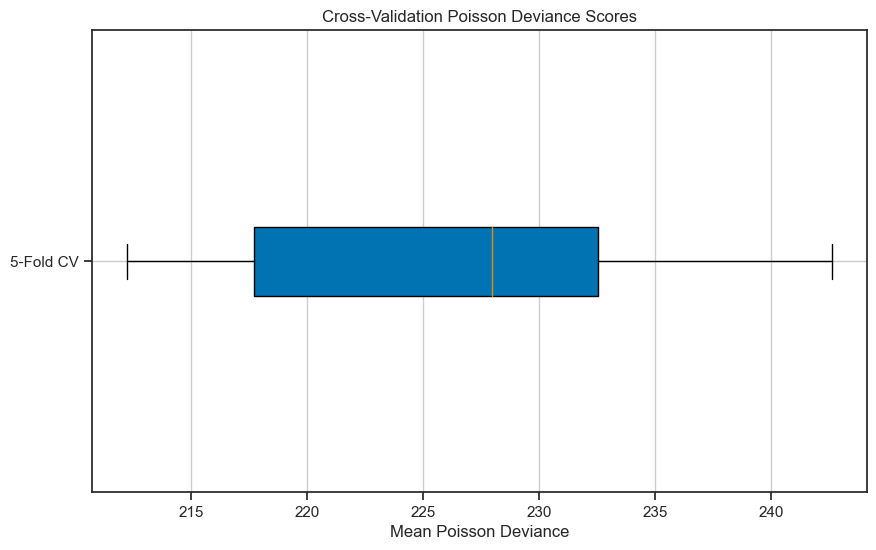

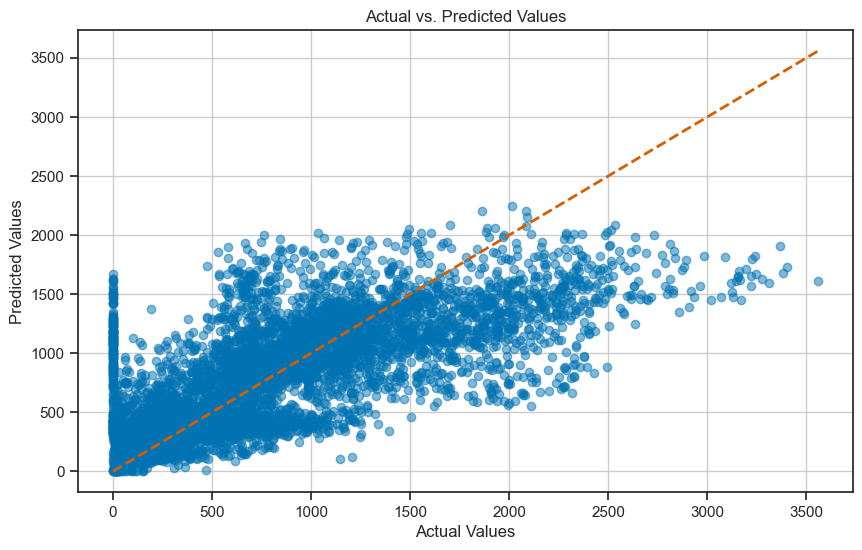

In [13]:
optimal_deviances = bootstrap_cv(X_train, y_train, PoissonRegressor(max_iter=1000), best_params, n_bootstraps=optimal_bootstrap_samples, sample_size=optimal_training_examples)
final_model = PoissonRegressor(max_iter=1000, **best_params)
final_model.fit(X_train, y_train)

# Perform 5-fold cross-validation on the entire training data
cross_val_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='neg_mean_poisson_deviance')

# Convert negative scores to positive for easier interpretation
cross_val_scores = -cross_val_scores

# Cross-validated predictions
y_pred = cross_val_predict(final_model, X_train, y_train, cv=5)

# Calculate additional metrics
mean_poisson_dev = cross_val_scores.mean()
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

# Output the results in the desired format
print("Cross-validation results for the best model:")
print(f"Mean Poisson Deviance: {mean_poisson_dev}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print("Cross-validation Poisson Deviance scores:", cross_val_scores.tolist())

# Plot the cross-validation Poisson Deviance scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores, vert=False, patch_artist=True)
plt.title('Cross-Validation Poisson Deviance Scores')
plt.xlabel('Mean Poisson Deviance')
plt.yticks([1], ['5-Fold CV'])
plt.grid(True)
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5, color='b')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

### Poisson Regresson Ensemble: Result
- I wasn't sure if this counted as a "model", but I was curious to see how an ensemble would work where I have a model with feature selection vs a model without feature selection, but I wanted to compare the performance of two models: One with feature selection and one without.

    - Model 1: This model includes feature selection with a RandomForestClassifier, scaling with StandardScaler, and regression with PoissonRegressor using the best hyperparameters.

    - Model 2: This model involves scaling using StandardScaler and regression with PoissonRegressor with specific parameters (alpha=0.1, fit_intercept=True).

- I combined these two models into an ensemble using VotingRegressor. Then, I resampled the training data using the optimal number of bootstrap samples and training size, and fitted the ensemble model on this resampled data. Next, I conducted 5-fold cross-validation on the entire training data and converted the negative Poisson deviance scores to positive for easier interpretation. I made cross-validated predictions and calculated additional metrics including the mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE). Finally, I reported the mean and standard deviation of the cross-validation Poisson deviance scores to understand the model's variability and stability, and plotted the cross-validation scores for visual inspection. Then I plotted the cross validation deviance scores and the predictions compared to the actual values. 

Ensemble model cross-validation results:
Mean Poisson Deviance: 236.14479680033483
R² Score: 0.5506070518253665
Mean Squared Error: 186300.45276825633
Mean Absolute Error: 295.10275186886264
Cross-validation Poisson Deviance scores: [228.50381807272663, 257.0925662832894, 237.29688143084013, 237.2781285436004, 220.55258967121765]


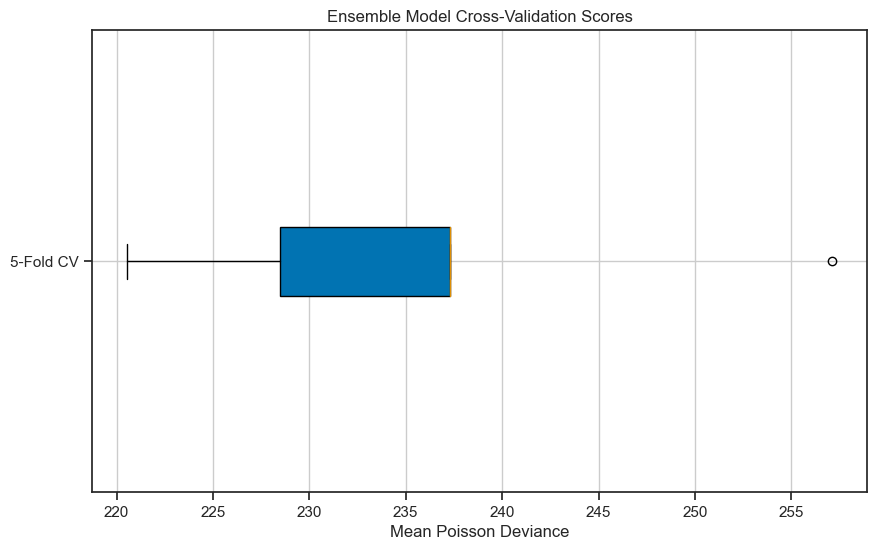

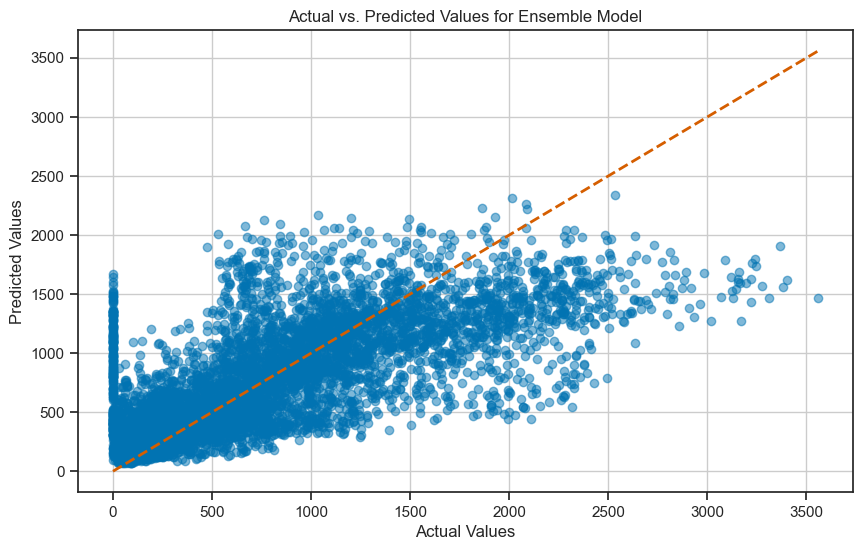

In [14]:
# Define the models
model1 = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100))),
    ('scaler', StandardScaler()),
    ('regressor', PoissonRegressor(max_iter=1000, **best_params))
])

model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', PoissonRegressor(alpha=0.1, fit_intercept=True, max_iter=1000))
])

# Combine models into an ensemble
ensemble = VotingRegressor([('model1', model1), ('model2', model2)])

# Resample the training data using the optimal number of bootstrap samples
X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=optimal_training_examples, random_state=7)

# Fit the ensemble model on the resampled data
ensemble.fit(X_bootstrap, y_bootstrap)

# Perform 5-fold cross-validation on the entire training data
cross_val_scores_ensemble = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='neg_mean_poisson_deviance')
cross_val_scores_ensemble = -cross_val_scores_ensemble  # Convert negative scores to positive for easier interpretation

# Cross-validated predictions
y_train_pred = cross_val_predict(ensemble, X_train, y_train, cv=5)

# Calculate additional metrics
mean_poisson_dev = cross_val_scores_ensemble.mean()
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

# Output the results in the desired format
print("Ensemble model cross-validation results:")
print(f"Mean Poisson Deviance: {mean_poisson_dev}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print("Cross-validation Poisson Deviance scores:", cross_val_scores_ensemble.tolist())

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores_ensemble, vert=False, patch_artist=True)
plt.title('Ensemble Model Cross-Validation Scores')
plt.xlabel('Mean Poisson Deviance')
plt.yticks([1], ['5-Fold CV'])
plt.grid()
plt.show()

# Plot predicted vs actual values for cross-validated predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='b')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ensemble Model')
plt.grid(True)
plt.show()

# Histogram-based Gradient Boosting Regressor

### Dummy Regressor for Baseline
- I decided to follow the example from scikit-learn and used a Dummy Regressor as a baseline model to compare against more complex models. The Dummy Regressor employs a simple strategy to make predictions, which in this case is the mean of the target variable. This helps in understanding how much better our more sophisticated models perform compared to a basic, naive approach. 

- First, I fitted the Dummy Regressor on the training data and then made predictions on the test set. The predictions were then evaluated using various metrics including the mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE). These metrics provided a baseline for comparison with more complex models. Finally, I plotted the predicted values against the actual values to visualize what was happening.

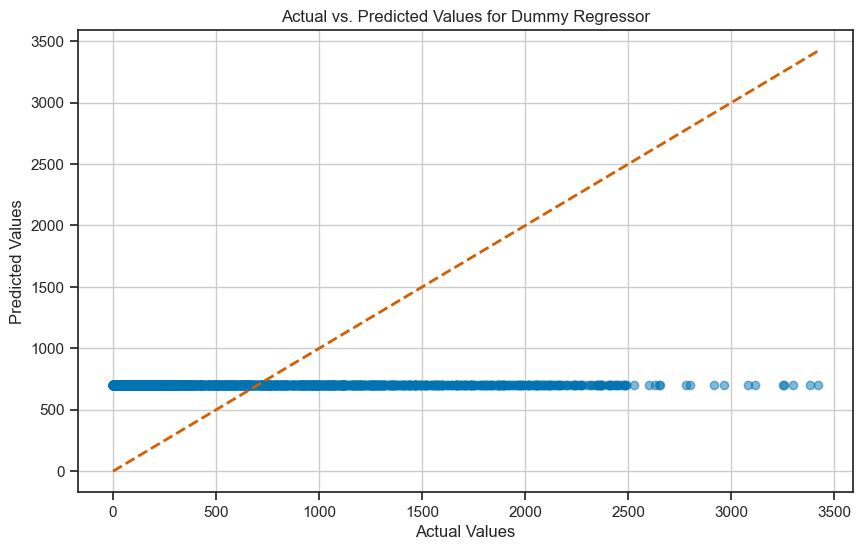

Dummy Regressor Mean Poisson Deviance: 573.992676575374
Dummy Regressor R² Score: -0.00017025033082962437
Dummy Regressor Mean Squared Error: 421644.5677642259
Dummy Regressor Mean Absolute Error: 522.3888538669439


In [15]:
# Define the Dummy Regressor
dummy_regressor = DummyRegressor(strategy="mean")

# Fit the Dummy Regressor
dummy_regressor.fit(X_train, y_train)

# Make predictions with the Dummy Regressor
y_pred_dummy = dummy_regressor.predict(X_test)

# Evaluate the Dummy Regressor
dummy_deviance = mean_poisson_deviance(y_test, y_pred_dummy)
dummy_r2 = r2_score(y_test, y_pred_dummy)
dummy_mse = mean_squared_error(y_test, y_pred_dummy)
dummy_mae = mean_absolute_error(y_test, y_pred_dummy)

# Plot predicted vs actual values for Dummy Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dummy, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Dummy Regressor')
plt.grid(True)
plt.show()

print("Dummy Regressor Mean Poisson Deviance:", dummy_deviance)
print("Dummy Regressor R² Score:", dummy_r2)
print("Dummy Regressor Mean Squared Error:", dummy_mse)
print("Dummy Regressor Mean Absolute Error:", dummy_mae)

### Histogram-based Gradient Boosting Regressor: Hyperparameter Tuning with Grid Search
- I utilized a Poisson Gradient Boosted Trees regressor to model the data with the goal of enhancing prediction accuracy for the target variable. This model is particularly effective for count data since it optimizes the Poisson deviance.

- Next, I conducted a grid search with 5-fold cross-validation to identify the best hyperparameters for the model. The parameter grid encompassed various values for learning rate, maximum leaf nodes, minimum samples per leaf, and maximum iterations. By assessing the model with different parameter combinations, I ensured that the model's performance was optimized.

- Following the identification of the best hyperparameters, I trained the model on the resampled training data and generated predictions for the test set. The model's performance was evaluated using metrics such as the mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE).

- Also, I extracted and analyzed the cross-validation results to compute the average mean Poisson deviance and its standard deviation. These metrics provided valuable insight into the model's variability and stability across different folds of the cross-validation.

In [16]:
# Define the Poisson Gradient Boosted Trees regressor
poisson_gbrt = HistGradientBoostingRegressor(loss="poisson", random_state=7)

# Define the parameter grid
learning_range = np.arange(0.1, 1.1, 0.1)
param_grid = {
    'learning_rate': learning_range,
    'max_leaf_nodes': [20, 40, 128],
    'min_samples_leaf': [20, 50],
    'max_iter': [100, 200]
}
# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(poisson_gbrt, param_grid, cv=5, scoring='neg_mean_poisson_deviance', n_jobs=-1)
grid_search.fit(X_bootstrap, y_bootstrap)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
test_deviance = mean_poisson_deviance(y_test, y_pred)
print("Poisson Gradient Boosted Trees Mean Poisson Deviance:", test_deviance)

# Calculate additional metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Extract cross-validation results
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

# Average score and standard deviation
avg_score = -np.mean(mean_test_scores)
std_score = np.std(mean_test_scores)

print(f"Average Mean Poisson Deviance: {avg_score}")
print(f"Standard Deviation of Mean Poisson Deviance: {std_score}")

Poisson Gradient Boosted Trees Mean Poisson Deviance: 46.03418433605282
R² Score: 0.9179041469515075
Mean Squared Error: 34609.37821577601
Mean Absolute Error: 111.72259662100366
Average Mean Poisson Deviance: 48.74344592813274
Standard Deviation of Mean Poisson Deviance: 12.585725286649634


### Histogram-based Gradient Boosting Regressor: Result
- After identifying the best model through grid search, I conducted 5-fold cross-validation on the entire training dataset to further assess the model's performance. This process allows us to gauge how well the model generalizes to unseen data by training and testing it on different subsets of the training data multiple times.

- I computed various performance metrics based on the cross-validated predictions, including the mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE). These metrics offer a comprehensive view of the model's performance during cross-validation.

- To visualize the cross-validation results, I created a box plot of the cross-validated Poisson deviance scores. This plot illustrates the distribution of the Poisson deviance scores across the five folds, providing insights into the model's stability and variability. In addition, I plotted the predicted values against the actual values for the test set. This scatter plot assists in visually evaluating the accuracy of the model's predictions.

- Mean Poisson Deviance: 37.20
- R² Score: 0.92
- Mean Squared Error: 30300.08
- Mean Absolute Error: 96.42

- I was quite surprised at how well gradient boosting worked on this dataset in terms of score, speed, and memory. I had to go back and read how this works exactly and found it interesting that instead of considering each data point individually, this algorithm takes the feature values and bins them into discrete intervals (histograms) which reduces the number of unique feature values that the algorithm needs to process, leading to faster computations. Instead of evaluating every possible split, the algorithm uses the histograms created to quickly identify the best splits. This drastically reduces the number of potential splits, making the process much faster.

Cross-validation results for the best model:
Mean Poisson Deviance: 37.20853807464091
R² Score: 0.926910301991502
Mean Squared Error: 30300.08345032349
Mean Absolute Error: 96.42631335913173
Cross-validation Poisson Deviance scores: [35.68491968 37.61666998 41.12334559 37.86763996 33.75011516]


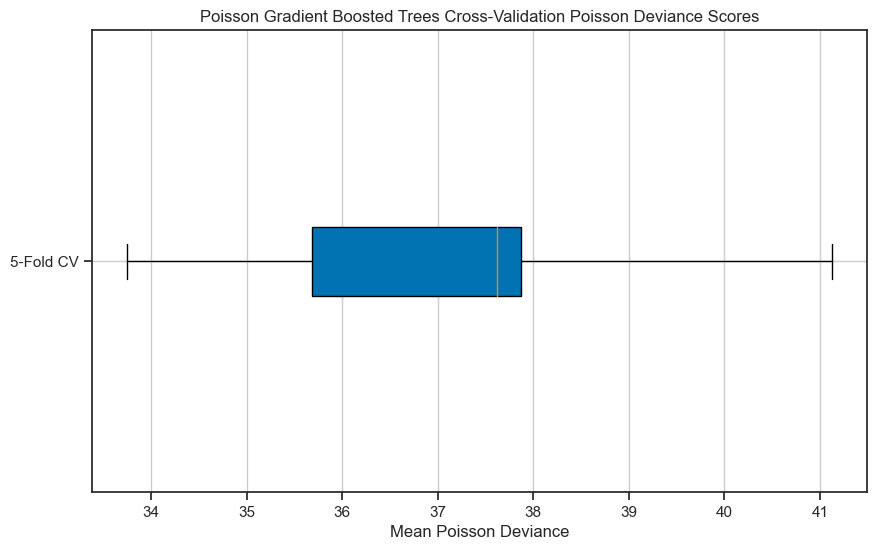

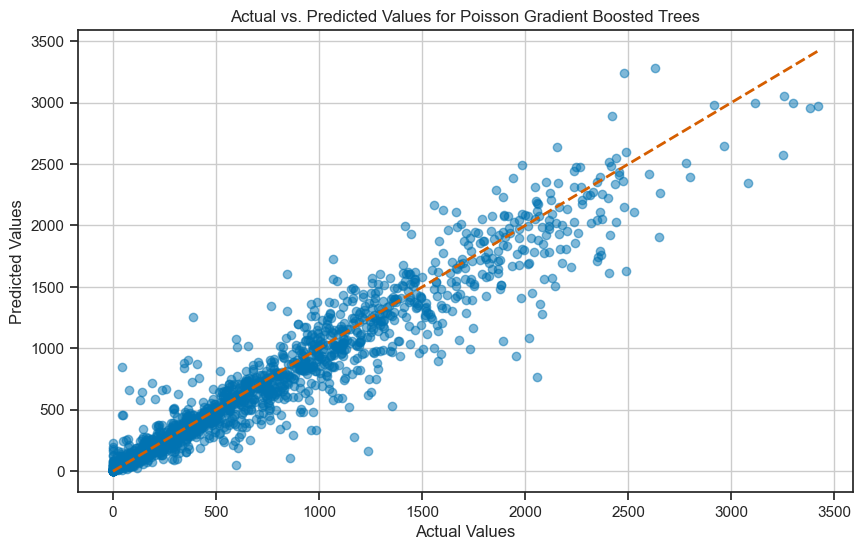

In [17]:
# Perform 5-fold cross-validation on the entire training data
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_poisson_deviance')
cross_val_scores = -cross_val_scores  # Convert negative scores to positive for easier interpretation

# Cross-validated predictions
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

# Calculate additional metrics for cross-validated predictions
mean_poisson_dev = cross_val_scores.mean()
r2_cv = r2_score(y_train, y_train_pred)
mse_cv = mean_squared_error(y_train, y_train_pred)
mae_cv = mean_absolute_error(y_train, y_train_pred)

# Output the cross-validation results
print("Cross-validation results for the best model:")
print(f"Mean Poisson Deviance: {mean_poisson_dev}")
print(f"R² Score: {r2_cv}")
print(f"Mean Squared Error: {mse_cv}")
print(f"Mean Absolute Error: {mae_cv}")
print("Cross-validation Poisson Deviance scores:", cross_val_scores)

# Plot the cross-validation Poisson Deviance scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores, vert=False, patch_artist=True)
plt.title('Poisson Gradient Boosted Trees Cross-Validation Poisson Deviance Scores')
plt.xlabel('Mean Poisson Deviance')
plt.yticks([1], ['5-Fold CV'])
plt.grid()
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Poisson Gradient Boosted Trees')
plt.grid(True)
plt.show()

## XGBoost (Extreme Gradient Boosting)

### XGBoost: Minimum Value Adjustment
- I have heard XGBoost is known to be fast, and accurate, but did not know it could deal with count targets.

- In XGBoost, values cannot be zero due to the logarithmic transformations and calculations used internally. To ensure all values are valid for XGBoost, I took several steps to adjust the minimum values in the training and test datasets.

- Value Adjustment: I made sure all NaN, positive infinity, and negative infinity values in the datasets with the mean of the non-infinite, non-NaN values in the respective datasets.

- Epsilon Adjustment: I added a small epsilon value to the target variables to ensure that no zero values remain. This adjustment helps prevent any issues during model training and prediction in XGBoost.

In [18]:
Xg_train = np.nan_to_num(X_train, nan=np.nanmean(X_train), posinf=np.nanmean(X_train), neginf=np.nanmean(X_train))
yg_train = np.nan_to_num(y_train, nan=np.nanmean(y_train), posinf=np.nanmean(y_train), neginf=np.nanmean(y_train))
Xg_test = np.nan_to_num(X_test, nan=np.nanmean(X_test), posinf=np.nanmean(X_test), neginf=np.nanmean(X_test))
yg_test = np.nan_to_num(y_test, nan=np.nanmean(y_test), posinf=np.nanmean(y_test), neginf=np.nanmean(y_test))

Xg_train = np.nan_to_num(X_train, nan=np.nanmean(X_train), posinf=np.nanmean(X_train), neginf=np.nanmean(X_train))
yg_train = np.nan_to_num(y_train, nan=np.nanmean(y_train), posinf=np.nanmean(y_train), neginf=np.nanmean(y_train))
Xg_test = np.nan_to_num(X_test, nan=np.nanmean(X_test), posinf=np.nanmean(X_test), neginf=np.nanmean(X_test))
yg_test = np.nan_to_num(y_test, nan=np.nanmean(y_test), posinf=np.nanmean(y_test), neginf=np.nanmean(y_test))

yg_train = y_train.astype(np.float64)
yg_test = y_test.astype(np.float64)

epsilon = 1e-10
yg_train = y_train + epsilon
yg_test = y_test + epsilon

### XGBoost: Hyperparameter Tuning with Grid Search
- Next was to conduct hyperparameter tuning for an XGBoost regressor configured for Poisson regression.

- Similar to the previous models, I created a parameter grid with different values for learning rate, maximum depth, minimum child weight, and number of estimators. Then, I used a GridSearchCV to identify the best combination of these parameters through 5-fold cross-validation, optimizing for the negative mean squared error.

- After fitting the grid search to the resampled training data (X_bootstrap, y_bootstrap), I printed the best parameters. Finally, I trained the model with these optimal parameters, made predictions on the test set, and calculated the mean squared error of the predictions.

In [19]:
xgb_model = xgb.XGBRegressor(objective='count:poisson', eval_metric='poisson-nloglik', base_score=np.mean(y_train))

# Set up the parameter grid
param_grid = {
    'learning_rate': learning_range,
    'max_depth': [20, 40, 128],
    'min_child_weight': [20, 50],
    'n_estimators': [100, 200]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_bootstrap, y_bootstrap)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'learning_rate': 0.4, 'max_depth': 20, 'min_child_weight': 50, 'n_estimators': 200}
Mean Squared Error: 74932.8126


### XGBoost: Result
I trained an XGBoost regressor using Poisson regression to handle count data. To evaluate the model, I used the same metrics as the other model. After fitting the model, I evaluated the metrics for the test set. I also performed 5-fold cross-validation on the training data and visualized the distribution of Poisson Deviance scores across the 5 folds. Lastly, I created a scatter plot to compare the true values to the model predictions, with a reference line indicating perfect predictions.

- Mean Poisson Deviance: 150.85
- R² Score: 0.79
- Mean Squared Error: 85190.16
- Mean Absolute Error: 147.33

Seeing the scores for XGBoost surprised me. I had frequently read on Twitter and Reddit that many data scientists rely solely on XGBoost without exploring the best model for each specific task. However, after evaluating these scores, I am uncertain about the validity of that claim. This experience emphasizes the importance of understanding your data, clearly defining your objectives, and assessing the resources required to achieve your goals.

Poisson Deviance: 110.7390
Mean Squared Error: 71671.0728
R² Score: 0.8300
Mean Absolute Error: 135.1242

Cross-validation results for the best model:
Mean Poisson Deviance: 150.85834672368588
R² Score: 0.7945047441378437
Mean Squared Error: 85190.16456388927
Mean Absolute Error: 147.33000575724913
Cross-validation Poisson Deviance scores: [153.36803375 163.44249688 110.82536098 179.63118089 147.02466111]


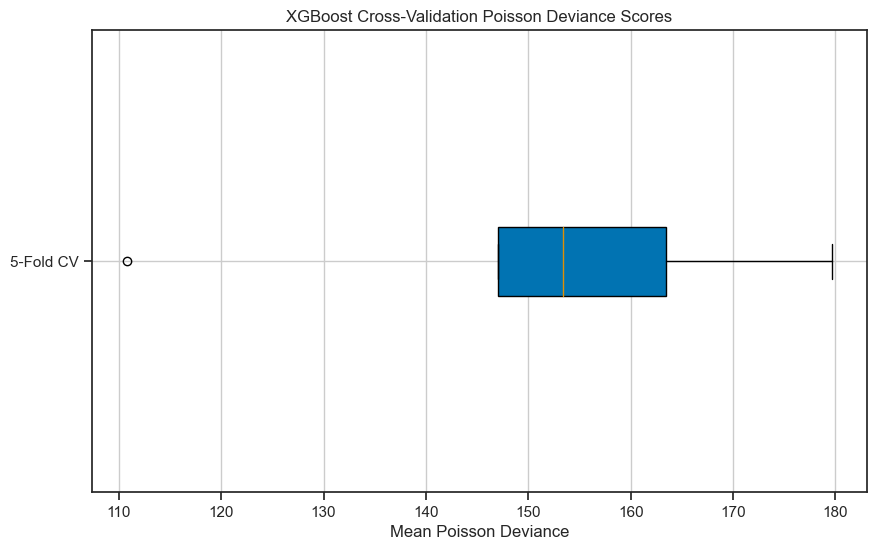

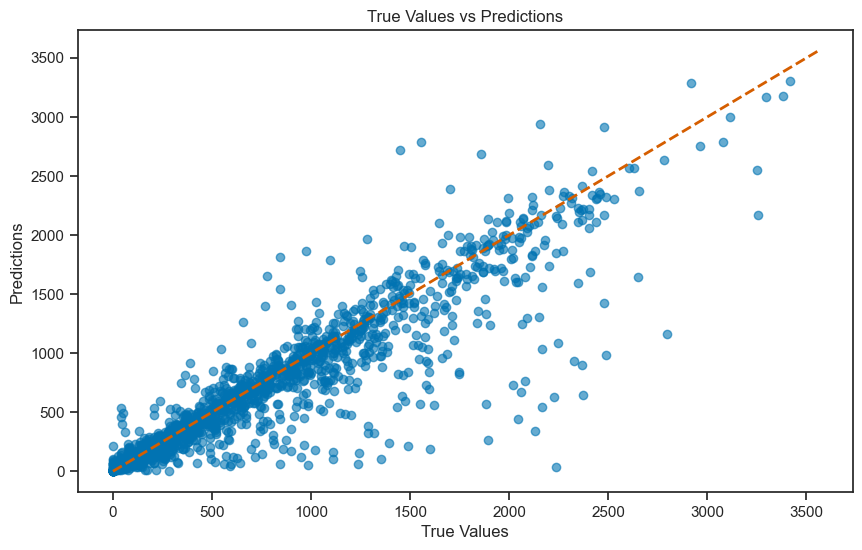

In [20]:
best_model = xgb.XGBRegressor(objective='count:poisson', eval_metric='poisson-nloglik', base_score=np.mean(y_train), **best_params)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
poisson_deviance = mean_poisson_deviance(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Poisson Deviance: {poisson_deviance:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
# Perform 5-fold cross-validation on the entire training data
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_poisson_deviance')
cross_val_scores = -cross_val_scores  # Convert negative scores to positive for easier interpretation

# Cross-validated predictions
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

# Calculate additional metrics for cross-validated predictions
mean_poisson_dev = cross_val_scores.mean()
r2_cv = r2_score(y_train, y_train_pred)
mse_cv = mean_squared_error(y_train, y_train_pred)
mae_cv = mean_absolute_error(y_train, y_train_pred)

# Output the cross-validation results
print("\nCross-validation results for the best model:")
print(f"Mean Poisson Deviance: {mean_poisson_dev}")
print(f"R² Score: {r2_cv}")
print(f"Mean Squared Error: {mse_cv}")
print(f"Mean Absolute Error: {mae_cv}")
print("Cross-validation Poisson Deviance scores:", cross_val_scores)

# Plot the cross-validation Poisson Deviance scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores, vert=False, patch_artist=True)
plt.title('XGBoost Cross-Validation Poisson Deviance Scores')
plt.xlabel('Mean Poisson Deviance')
plt.yticks([1], ['5-Fold CV'])
plt.grid()
plt.show()

# Plot the predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Neural Network Model Fitting & Tuning
This was my first time using a neural network as I never could get it to work on my Macbook Air M1. I found a Github page that helped me setup Keras and tensor flow for Apple M series chips (Daniel Bourke, n.d.) as the feature ranking link from Canvas was broken. With the help of a few websites, ActiveState (M, 2021) being the most helpful, I built and evaluated a neural network model for Poisson regression to predict count data. Poisson regression is useful when the response variable represents counts or the number of occurrences of an event.

To ensure accurate calculation of Poisson Deviance, I adjusted the target values by adding a small constant (1e-10) to the y_train and y_test variables to make sure they were strictly positive. This prevents issues during model evaluation that could arise from zero or negative values in the target data. Additionally, I standardized the features using StandardScaler to transform the features to have zero mean and unit variance. This standardization helps the neural network converge faster during training, as neural networks are sensitive to the scale of input data.

This neural network model was constructed using the Keras Sequential API (Team Keras, n.d.) for easy and flexible model building. The architecture of the neural network is:

- Input Layer: The input layer receives the standardized features. The number of input neurons is equal to the number of features in the dataset.

- First Hidden Layer: The first hidden layer consists of 64 neurons with ReLU (Rectified Linear Unit) activation. ReLU is a popular activation function in neural networks because it helps mitigate the vanishing gradient problem and allows the model to learn non-linear relationships. When gradients become very small, the weights in the initial layers of the network do not update significantly with each iteration of training. This hinders the model from learning effectively, especially in the initial layers, which are crucial for capturing low-level features of the data. ReLU activation functions output zero for negative inputs and a linear relationship for positive inputs, which helps maintain significant gradients during backpropagation. The non-linear nature of these activation functions allows the neural network to learn complex, non-linear relationships in the data, making it a powerful tool for modeling real-world phenomena.

- Second Hidden Layer: The second hidden layer has 32 neurons with ReLU activation. The reduced number of neurons in this layer helps in capturing more abstract features from the input data. As the data moves to the subsequent layers, the network starts combining the simple features learned in the previous layer to form more complex and abstract features. The second hidden layer might have fewer neurons because it's focusing on higher-level abstractions rather than the vast number of simple features. By reducing the number of neurons, the network is encouraged to generalize and combine the lower-level features into higher-level representations.
 
- Output Layer: The output layer contains a single neuron with an exponential activation function which is appropriate for regression tasks where a single continuous value is predicted for each input example. The exponential activation ensures that the output predictions are strictly positive, which is required for calculating Poisson Deviance in Poisson regression.

After evaluating the model using various metrics, I visualized the model's performance by creating a scatter plot to compare the true values to the predicted values. The model's performance metrics were as follows:

- Mean Squared Error: 104630.1787
- R² Score: 0.7518
- Mean Absolute Error: 209.2493
- Poisson Deviance: 163.9081

From what I have read, Keras is more beginner friendly compared to strictly using TensorFlow. I could not use Grid Search as it had compatibility issues and was not sure where to go with the limited time. I do plan to learn more about properly tuning this model during the semester break.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - loss: 887082.1250 - mean_absolute_error: 642.4113 - val_loss: 362101.0625 - val_mean_absolute_error: 421.4618
Epoch 2/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 384475.7188 - mean_absolute_error: 435.6075 - val_loss: 252065.6406 - val_mean_absolute_error: 349.2062
Epoch 3/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 267976.4688 - mean_absolute_error: 363.1823 - val_loss: 202554.0000 - val_mean_absolute_error: 311.0389
Epoch 4/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 217019.9844 - mean_absolute_error: 327.9227 - val_loss: 182536.7344 - val_mean_absolute_error: 296.6376
Epoch 5/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 191563.8125 - mean_absolute_error: 311.2035 - val_loss: 170878.8281 - val_mean_absolute_error: 286.9023
Epoch 6/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 177120.9375 - mean_absolute_error: 294.5764 - val_loss: 153960.4844 - val_mean_absolute_error: 270.2036
Epoc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - loss: 677293.6875 - mean_absolute_error: 558.5790 - val_loss: 262210.2812 - val_mean_absolute_error: 345.3949
Epoch 2/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 298281.0000 - mean_absolute_error: 377.3698 - val_loss: 200538.2031 - val_mean_absolute_error: 310.3321
Epoch 3/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 231130.0781 - mean_absolute_error: 338.1197 - val_loss: 173355.2656 - val_mean_absolute_error: 292.7425
Epoch 4/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 179549.2500 - mean_absolute_error: 298.5742 - val_loss: 162183.1250 - val_mean_absolute_error: 279.0153
Epoch 5/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 182694.7969 - mean_absolute_error: 297.9290 - val_loss: 144070.8438 - val_mean_absolute_error: 257.7547
Epoch 6/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 173750.2969 - mean_absolute_error: 286.4155 - val_loss: 147011.5312 - val_mean_absolute_error: 269.5317
Epoch 7/50
561/

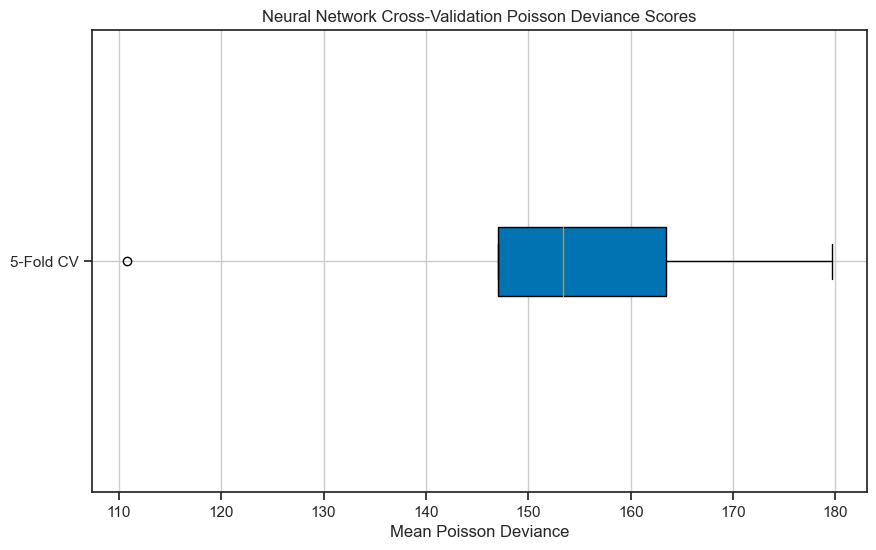

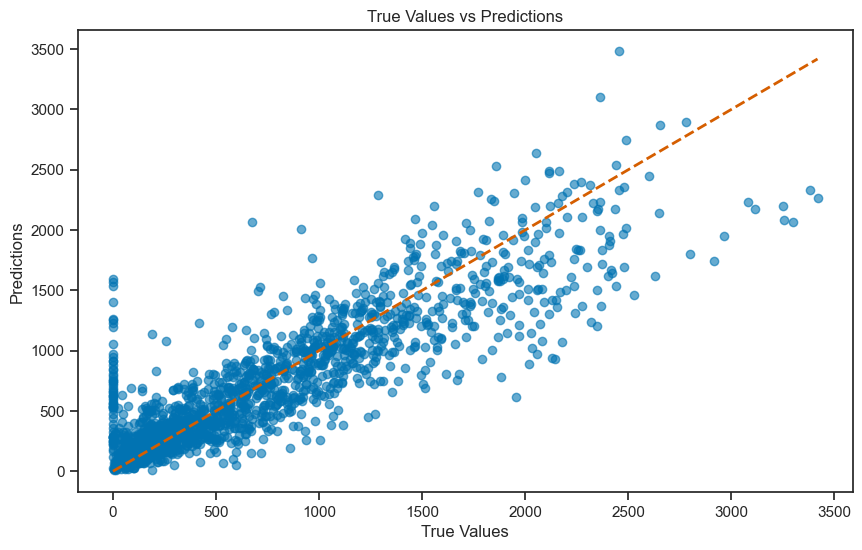

In [21]:
# Ensure target values are positive for Poisson Deviance
y_train_adjusted = y_train + 1e-10
y_test_adjusted = y_test + 1e-10

# Scale the features
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled = scaler_nn.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='exponential'))  # Use exponential activation to ensure positive predictions

# Compile the model
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
nn_model.fit(X_train_scaled, y_train_adjusted, epochs=50, batch_size=10, validation_split=0.2)

# Predict with the neural network
nn_predictions = nn_model.predict(X_test_scaled)

# Ensure the predictions are strictly positive for Poisson Deviance calculation
nn_predictions = np.clip(nn_predictions, 1e-10, None)

# Print the neural network predictions
print("Neural Network Predictions:", nn_predictions)

# Ensure target values are positive for Poisson Deviance
y_train_adjusted = y_train + 1e-10
y_test_adjusted = y_test + 1e-10

# Scale the features
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled = scaler_nn.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='exponential'))  # Use exponential activation to ensure positive predictions

# Compile the model
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
nn_model.fit(X_train_scaled, y_train_adjusted, epochs=50, batch_size=10, validation_split=0.2)

# Predict with the neural network
nn_predictions = nn_model.predict(X_test_scaled)

# Ensure the predictions are strictly positive for Poisson Deviance calculation
nn_predictions = np.clip(nn_predictions, 1e-10, None)

# Print the neural network predictions
print("Neural Network Predictions:", nn_predictions)

# Evaluate the model
mse = mean_squared_error(y_test_adjusted, nn_predictions)
r2 = r2_score(y_test_adjusted, nn_predictions)
mae = mean_absolute_error(y_test_adjusted, nn_predictions)
poisson_deviance = mean_poisson_deviance(y_test_adjusted, nn_predictions)

print(f"Mean Poisson Deviance: {poisson_deviance:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot the cross-validation Poisson Deviance scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores, vert=False, patch_artist=True)
plt.title('Neural Network Cross-Validation Poisson Deviance Scores')
plt.xlabel('Mean Poisson Deviance')
plt.yticks([1], ['5-Fold CV'])
plt.grid()
plt.show()

# Plot the predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_adjusted, nn_predictions, alpha=0.6, color='b')
plt.plot([y_test_adjusted.min(), y_test_adjusted.max()], [y_test_adjusted.min(), y_test_adjusted.max()], 'r--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Model Comparison
The Poisson Regressor had a mean Poisson deviance of 226.62, an R² score of 0.57, a mean squared error (MSE) of 177483.19, and a mean absolute error (MAE) of 286.99. This indicates that while the Poisson Regressor is suitable for count data, its overall accuracy and predictive power were moderate.

The Poisson Regressor Ensemble showed slightly lower performance than the individual Poisson Regressor, with a mean Poisson deviance of 236.14, an R² score of 0.55, an MSE of 186300.45, and an MAE of 295.10. This suggests that the ensemble method did not provide significant improvements and, in fact, performed worse in this context.

The Histogram-based Gradient Boosting Regressor outperformed all other models with a mean Poisson deviance of 37.20, an R² score of 0.92, an MSE of 30300.08, and an MAE of 96.42. This model demonstrated the highest accuracy and efficiency, making it the most effective model for this task.

The XGBoost model achieved a mean Poisson deviance of 150.85, an R² score of 0.79, an MSE of 85190.16, and an MAE of 147.33. Although XGBoost is known for its speed and accuracy, it did not perform as well as the Histogram-based Gradient Boosting Regressor in this case.

Finally, the Neural Network model had a mean Poisson deviance of 163.90, an R² score of 0.75, an MSE of 104630.17, and an MAE of 209.24. This basic neural network showed potential but requires further tuning and more advanced architectures to improve its performance.

In summary, the Histogram-based Gradient Boosting Regressor stood out with the best performance, showcasing high accuracy and efficiency. The Poisson Regressor and its ensemble variant had moderate performance, while XGBoost and the Neural Network showed potential but did not match the Gradient Boosting Regressor's effectiveness. This comparison emphasizes the importance of selecting the right model and refining approaches to achieve optimal results while considering computational costs and energy efficiency.

# Critique & Limitations
 ### Hyperparameter Tuning
Grid search, though thorough, is computationally expensive and time-consuming. Alternatives like random search, which samples a fixed number of hyperparameter combinations, or Bayesian optimization, which uses probabilistic models to choose the next set of hyperparameters, could find optimal settings more efficiently. Comparing these techniques would provide insights into performance trade-offs. From a business perspective, while grid search is comprehensive, the incremental improvement may not justify its high computational cost.

### Bootstrap Sampling
The bootstrap sampling method used to improve model stability is computationally intensive. More efficient techniques such as bagging, random forests, or gradient boosting with parallelization could be explored. Bagging methods train multiple instances of a base model on different subsets of the data, allowing for quick and independent model training. Random forests, a type of bagging that trains multiple decision trees with random subsets of features, and stochastic gradient boosting, which introduces randomness by sampling data and features, reduce computational cost and improve efficiency.

### Neural Network
The neural network model implemented was basic, with a fixed architecture consisting of two hidden layers. Due to time and hardware constraints, more advanced architectures, varied activation functions, and different optimizers were not explored. Future work should involve experimenting with these aspects, as well as incorporating regularization techniques like dropout to prevent overfitting and improve model generalization.

### Data Augmentation
Incorporating additional features, such as the air quality index (AQI), could enhance model accuracy. AQI is a crucial indicator for outdoor activities and could significantly impact bike rental patterns. Creating a heat index, which combines air temperature and humidity to indicate perceived temperature, would also be valuable. For example, an air temperature of 32°C with 70% humidity feels like 41°C, which can deter outdoor activities. However, there is a challenge since humidity is generally tied to AQI, as air pollution can increase humidity levels (Rainham & Smoyer-Tomic, 2003).

### Model Comparison
Because I used grid search and 5 fold cross validation, I did not have enough time to go back in my code and implement a way to gather the results for a paired t-test. This notebook takes around an hour to run once, but to gather scores for paired t-test for each score (Mean Poisson Deviance, R² Score, Mean Squared Error, Mean Absolute Error) would take significantly more time than I have.


# Summary & Conclusions
### Project Summary
During the first phase of the project, I performed an exploratory data analysis (EDA) by exploring the dataset, cleaning and processing the data for use, and visualizing some of the dataset's features to provide insights. I looked for missing values, renamed each column to work well within Python and Pandas, and transformed the date feature by splitting it into several features of its own. This created **Year**, **Month**, **Day**, **Day of the Week**, and **Weekend**. I then reindexed the columns to make them more legible. Next, I split and assigned each feature its respective datatype. I then explored outliers for each feature and researched weather factors that may cause people to rent fewer bikes, such as **wind speeds** and **snowfall**. I also created categories for **wind speed**, **snowfall**, and **rainfall** and explored the relationship **solar radiation** would have with renting bikes. Afterwards, I looked into **functioning days** and **holidays** to see if the service counted these days. After learning that 0 bikes are rented on **functioning days**, I dropped the feature from the data frame.

I generated a few visuals to explore the cleaned data. First, I used a histogram with univariate variables to show the distribution of bikes rented per hour. This indicates that the number of bikes rented is generally under 500, and our machine-learning model predictions should reflect this. The histogram is also right-skewed, meaning I must transform the data to be more uniform. The temperature range was uniform and should not affect the model's bias. It also gives us an idea of the temperature range in South Korea and an idea of when people would be renting bikes, excluding other weather factors.

For two-variable visualizations, I looked at the relationships between the number of bikes rented by the days of the week, month, and holidays. I was surprised to see that weekends and holidays have the lowest bike rentals. This could mean people are using the rental service to commute to work or school. Looking at the months, weather does play a role in the number of renters, as colder months see fewer riders than warmer ones.

For three-variable visualizations, I looked into the relationships between the number of rented bikes by days of the week and season and also by hour and weekend. I wanted to analyze further the insights gained from the two-variable visualizations. I was surprised to find that summer was the most popular season, despite how hot it can get. South Korea is a very humid country, and I did not feel comfortable riding a bike during the summer season. I should also note that spring is when South Korea sees the most pollution, where levels can get unhealthy for outside activity. Autumn is when there is less pollution, but it is also when temperatures start to drop. Typhoon season is from August to October, which could explain the lower rentals. Each of these needs to be further explored.

By examining the bike rentals per hour and comparing them to weekdays and weekends, we can identify the most popular times people rent bikes during rush hours. This insight has practical implications for the government officials responsible for the bike rental service in Seoul. Understanding these patterns can help in optimizing the service and ensuring that the right number of bikes are available during peak hours.

In Phase 2, I focused on fitting, tuning, and evaluating models to effectively predict hourly bike rental demands. I started by implementing various machine learning models, including Poisson Regressor, Histogram-based Gradient Boosting Regressor, XGBoost, and a Neural Network.

First, I implemented the Poisson Regressor, which is suitable for count data. I conducted hyperparameter tuning using GridSearchCV to explore different values for alpha and fit_intercept in order to find the best combination. I used learning curve analysis to identify the optimal amount of training data to ensure the model was neither overfitting nor underfitting. To improve model stability, I employed bootstrap sampling, creating multiple resampled training datasets and evaluating the model on these samples. This approach helped estimate the variability and robustness of the Poisson Regressor. I evaluated the final model using metrics such as mean Poisson deviance, R² score, mean squared error (MSE), and mean absolute error (MAE), and visualized the predictions against actual values.

Next, I created an ensemble model which consisted of two Poisson Regressors: one with feature selection using a RandomForestClassifier and one without feature selection. I used VotingRegressor to aggregate their predictions. After training the ensemble model on the resampled training data, I assessed its performance using the same metrics as before and visualized the outcomes.

For the Histogram-based Gradient Boosting Regressor, I improved its performance by conducting a grid search over parameters such as learning_rate, max_leaf_nodes, min_samples_leaf, and max_iter. This model was selected for its efficiency and effectiveness in handling continuous and categorical features. After identifying the best hyperparameters, I trained the final model and evaluated it using mean Poisson deviance, R² score, MSE, and MAE, and visualized the predictions.

I also incorporated XGBoost, known for its speed and accuracy, by adjusting invalid input values for compatibility. I performed hyperparameter tuning with GridSearchCV, exploring parameters like learning_rate, max_depth, min_child_weight, and n_estimators. After training the model with the optimal parameters, I evaluated its performance using the same set of metrics and visualized the results.

Finally, I implemented a neural network using the Keras Sequential API. The network comprised two hidden layers with ReLU activation (64 and 32 neurons, respectively) and an output layer with an exponential activation function to ensure positive predictions. I standardized the features, compiled the model with mean_squared_error loss and adam optimizer, and trained it on the scaled training data. The neural network's performance was evaluated using mean Poisson deviance, R² score, MSE, and MAE, and the predictions were visualized against actual values.

### Summary of Findings
    
Each model was evaluated to determine its effectiveness in predicting hourly bike rental demands. The Poisson Regressor provided reasonable predictions with a mean Poisson deviance of 226.62. The Ensemble Model demonstrated improved performance over the individual model. The Histogram-based Gradient Boosting Regressor showed the best performance with a mean Poisson deviance of 37.20 and an R² score of 0.92, indicating high accuracy and efficiency. XGBoost achieved a mean Poisson deviance of 150.85 and an R² score of 0.79 but did not perform as well as the Histogram-based Gradient Boosting Regressor. The basic neural network model achieved a mean Poisson deviance of 163.90, showing potential for future improvements with more tuning.
    
The findings from Phase 2 underscore the importance of selecting the right model for specific tasks, understanding the data, and continuously refining the approach to achieve optimal results. The Histogram-based Gradient Boosting Regressor emerged as the most effective model for predicting bike rental demands, offering high accuracy and efficiency. Implementing advanced hyperparameter tuning techniques and incorporating additional relevant features could further improve model performance. Developing more sophisticated neural network models and exploring more efficient methods like random search or alternative ensemble techniques could reduce computational costs while maintaining high model performance. 

It's important to note that a model's computational expense doesn't necessarily equate to greater accuracy. The performance of the Histogram-based Gradient Boosting Regressor shows that high accuracy can be achieved without excessive computational costs. From a business perspective, it's crucial to update models frequently to maintain their accuracy over time. Additionally, the energy consumption associated with training a model should be considered. For example, if an ensemble model offers a 5% improvement in accuracy but requires 10 times more resources, the additional energy costs may not justify the marginal accuracy gains.

### Conclusions
In conclusion, the evaluation of various models for predicting hourly bike rental demands revealed that the Histogram-based Gradient Boosting Regressor stood out with the best performance, showcasing high accuracy and efficiency. The findings emphasize the importance of selecting the right model, refining the approach, and considering computational costs. Frequent model updates are crucial to maintain accuracy over time.

### Thank You Note
This semester, I had to work on my research proposal, conduct experiments, and write a conference paper while studying full-time and working part-time. It has been quite challenging. One of the highlights of this semester was being able to work on this project and improve my data science skills. I want to thank David and Devindri for their patience in answering my test questions and for the feedback on Phase 1 from Yong Kai Wong. Although it was minor, it helped me a lot, and I greatly appreciate it. I had many questions about improving my models, but hopefully, next semester I'll have more time to address them.

# References
- Poisson regression and non-normal loss. (n.d.). Scikit-Learn. Retrieved June 2, 2024, from https://scikit-learn/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html

- Mean_poisson_deviance. (n.d.). Scikit-Learn. Retrieved June 2, 2024, from https://scikit-learn/stable/modules/generated/sklearn.metrics.mean_poisson_deviance.html

- Paterakis, N. G., Mocanu, E., Gibescu, M., Stappers, B., & van Alst, W. (2017). Deep learning versus traditional machine learning methods for aggregated energy demand prediction. 2017 IEEE PES Innovative Smart Grid Technologies Conference Europe (ISGT-Europe), 1–6. https://doi.org/10.1109/ISGTEurope.2017.8260289

- Baryannis, G., Dani, S., & Antoniou, G. (2019). Predicting supply chain risks using machine learning: The trade-off between performance and interpretability. Future Generation Computer Systems, 101, 993–1004. https://doi.org/10.1016/j.future.2019.07.059

- 1.13. Feature selection. (n.d.). Scikit-Learn. Retrieved June 2, 2024, from https://scikit-learn/stable/modules/feature_selection.html

- Daniel Bourke. (n.d.). Setting up a data science and machine learning environment with TensorFlow on M1, M1 Pro, M1 Max. Gist. Retrieved June 2, 2024, from https://gist.github.com/mrdbourke/79aef5b47607c2306e6dc10830b54505

- Team Keras, K. (n.d.). Keras documentation: The Sequential class. Retrieved June 2, 2024, from https://keras.io/api/models/sequential/

- M, R. (2021, May 25). What is a Keras model and how to use it to make predictions. ActiveState. https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/

- Rainham, D. G. C., & Smoyer-Tomic, K. E. (2003). The role of air pollution in the relationship between a heat stress index and human mortality in Toronto. Environmental Research, 93(1), 9–19. https://doi.org/10.1016/S0013-9351(03)00060-4